In [1]:
#SVR - Support Vector Machine for regression
# Data Preprocessing Template
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [2]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
#we don't apply training and test set because we don't have enough data
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)\n'

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Reshape the target variable 'y' to a 2D array
y = y.reshape(-1, 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [5]:
#fitting  SVR model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/Users/abhinavsharma/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

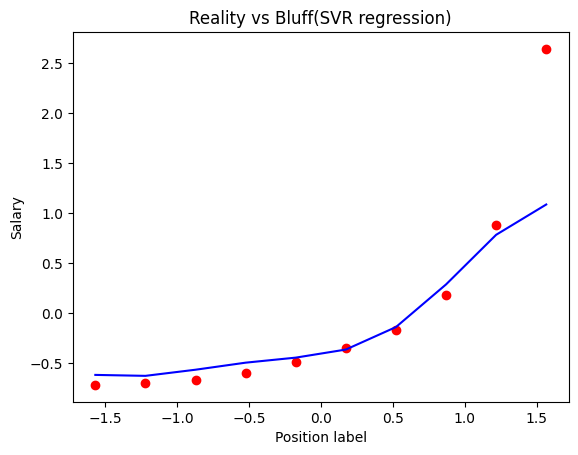

In [6]:
#visualize SVR results
plt.scatter(X, y, color= 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Reality vs Bluff(SVR regression)')
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

In [7]:
# Predicting a new result with SVR
input_value = 6.5
scaled_input = sc_X.transform(np.array([[input_value]]))  # Transform input to match scaled data
scaled_prediction = regressor.predict(scaled_input)

# Inverse transform the scaled prediction to get the original value
predicted_salary = sc_y.inverse_transform(np.array([scaled_prediction]))  # Wrap scaled_prediction in np.array

print(f"The predicted salary for a position level of {input_value} is: ${predicted_salary[0]}")


The predicted salary for a position level of 6.5 is: $[170370.0204065]
